In [ ]:
import pandas as pd
import numpy as np

In [ ]:
! pip install opendatasets --quiet
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/hiteshyadavx/tweet-emotion-recognition")

Dataset URL: https://www.kaggle.com/datasets/hiteshyadavx/tweet-emotion-recognition


100%|██████████| 713k/713k [00:00<00:00, 719MB/s]

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/tweet-emotion-recognition/val.csv")
df.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
train_df = pd.read_csv("/content/tweet-emotion-recognition/train.csv")
val_df   = pd.read_csv("/content/tweet-emotion-recognition/val.csv")
test_df  = pd.read_csv("/content/tweet-emotion-recognition/test.csv")

In [ ]:
X_train = train_df["text"].astype(str).values
y_train = train_df["label"].values

X_val = val_df["text"].astype(str).values
y_val = val_df["label"].values

X_test = test_df["text"].astype(str).values
y_test = test_df["label"].values


In [ ]:
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc   = label_encoder.transform(y_val)
y_test_enc  = label_encoder.transform(y_test)

num_classes = len(label_encoder.classes_)
print("Классы эмоций:", label_encoder.classes_)

Классы эмоций: [0 1 2 3 4 5]


In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq   = tokenizer.texts_to_sequences(X_val)
X_test_seq  = tokenizer.texts_to_sequences(X_test)


In [ ]:
max_len = 40

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post")
X_val_pad   = pad_sequences(X_val_seq, maxlen=max_len, padding="post")
X_test_pad  = pad_sequences(X_test_seq, maxlen=max_len, padding="post")


In [ ]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_len),
    LSTM(64),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train_pad, y_train_enc,
    validation_data=(X_val_pad, y_val_enc),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9470 - loss: 0.1742 - val_accuracy: 0.8840 - val_loss: 0.4321
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9532 - loss: 0.1477 - val_accuracy: 0.8785 - val_loss: 0.5092
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9630 - loss: 0.1264 - val_accuracy: 0.8845 - val_loss: 0.4494
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9671 - loss: 0.1168 - val_accuracy: 0.8965 - val_loss: 0.4304
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9709 - loss: 0.1020 - val_accuracy: 0.8845 - val_loss: 0.4731
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9720 - loss: 0.0942 - val_accuracy: 0.8965 - val_loss: 0.5011
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9804 - loss: 0.0744 - val_accuracy: 0.8905 - val_loss: 0.4951


In [ ]:
loss, acc = model.evaluate(X_test_pad, y_test_enc)
print(f"Точность на тестовой выборке: {acc*100:.2f}%")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8845 - loss: 0.4292
Точность на тестовой выборке: 88.30%


In [ ]:
def predict_emotion(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=max_len, padding="post")
    pred = model.predict(pad)
    class_id = np.argmax(pred, axis=1)[0]
    return label_encoder.inverse_transform([class_id])[0]

print(predict_emotion("I am so happy today!"))
print(predict_emotion("This is terrible and sad"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
0


In [ ]:
#categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)

In [ ]:
print(predict_emotion("i cant walk into a shop anywhere where i do not feel uncomfortable"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4


In [ ]:
print(predict_emotion("i jest i feel grumpy tired and pre menstrual which i probably am but then again its only been a week"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


<Figure size 800x600 with 0 Axes>

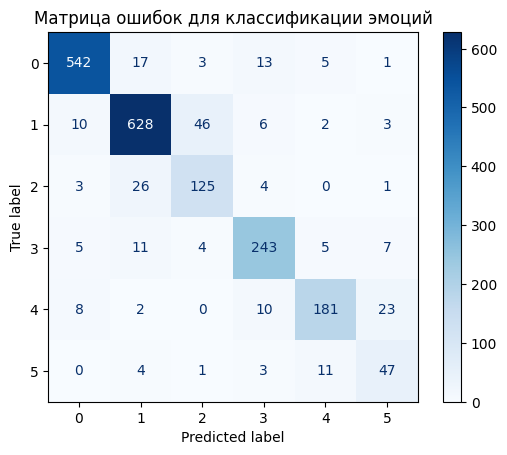

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Предсказания на тестовой выборке
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)
# Матрица ошибок
cm = confusion_matrix(y_test_enc, y_pred)
# Визуализация
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=label_encoder.classes_
)
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Матрица ошибок для классификации эмоций")
plt.show()
